# Logistical Regression Analysis:

### Covers data loading, preprocessing, exploratory data analysis, feature selection, model training, evaluation, result interpretation and prediction for a new input.

**Introduction**
This project aims to predict whether it will rain tomorrow in Australia based on historical weather data using a logistic regression model.

**Dataset context**
This dataset sourced from kaggle contains about 10 years of daily weather observations from numerous Australian weather stations.

RainTomorrow is the target variable to predict. It means, did it rain the next day - Yes or No?
This column is Yes if the rain for that day was 1mm or more.

https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

In [1]:
# Import necessary libraries for data analysis and modeling

import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical computations
import matplotlib.pyplot as plt # For data visualisation
import seaborn as sns # For enhanced data visualisation

from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature standardisation
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # For model evaluation

In [2]:
df = pd.read_csv('weatherAUS.csv')

df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.shape

(145460, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

print(columns_with_missing)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


In [6]:
# Handle missing values
for column in columns_with_missing:
    # print(column)
    # print(df[column].dtype)
    # Numerical columns: impute with mean
    if df[column].dtype == 'float64':
        imputer = SimpleImputer(strategy='mean')
        df[column] = imputer.fit_transform(df[[column]])
    # Categorical columns: impute with mode
    else:
        imputer = SimpleImputer(strategy='most_frequent')
        df[column] = imputer.fit_transform(df[[column]])[:, 0]

# Verify that all missing values have been handled
print(df.isnull().sum())

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [7]:
df['Date'].duplicated().sum()

142024

Exploratory Data Analysis (EDA)

In [8]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     113583
Yes     31877
Name: count, dtype: int64

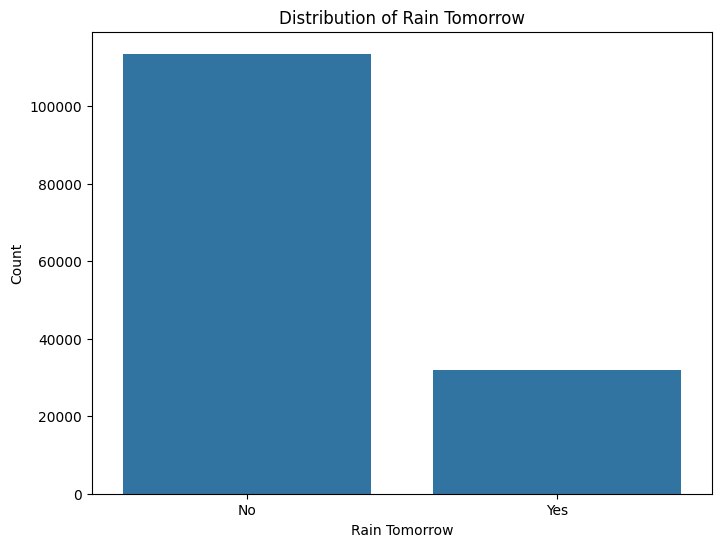

In [9]:
# Visualise the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='RainTomorrow')
plt.title('Distribution of Rain Tomorrow')
plt.xlabel('Rain Tomorrow')
plt.ylabel('Count')
plt.show()

In [10]:
# Summary Statistics of Selected Numerical Features
selected_numerical_features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']
df[selected_numerical_features].describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.194034,23.221348,2.360918,40.035230,68.880831,51.539116
std,6.365750,7.088124,8.382488,13.118253,18.854765,20.471189
min,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,31.000000,57.000000,37.000000
50%,12.100000,22.700000,0.000000,39.000000,69.000000,51.539116
75%,16.800000,28.200000,1.000000,46.000000,83.000000,65.000000
max,33.900000,48.100000,371.000000,135.000000,100.000000,100.000000


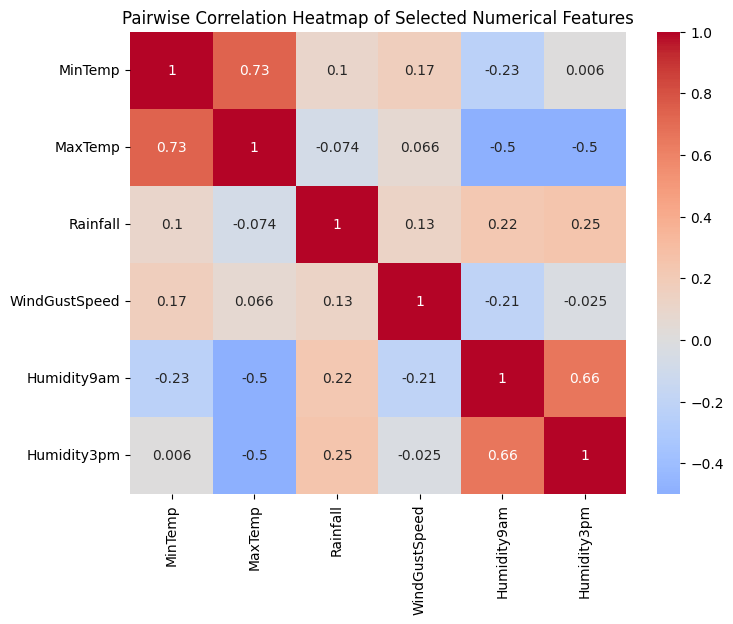

In [11]:
# Pairwise Correlation Heatmap of Selected Numerical Features
plt.figure(figsize=(8, 6))
sns.heatmap(df[selected_numerical_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Pairwise Correlation Heatmap of Selected Numerical Features')
plt.show()

<Figure size 1000x600 with 0 Axes>

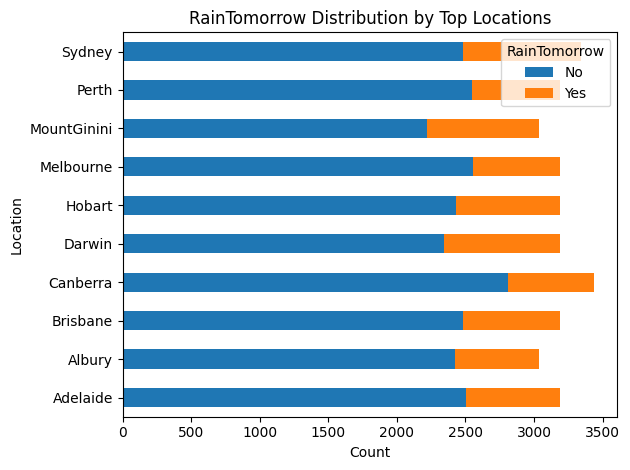

In [12]:
# Select top 10 locations with the highest counts
top_locations = df['Location'].value_counts().head(10).index

# Filter the DataFrame for top locations
top_location_df = df[df['Location'].isin(top_locations)]

# Visualize the distribution of RainTomorrow across top locations
plt.figure(figsize=(10, 6))
location_rain_distribution = top_location_df.groupby(['Location', 'RainTomorrow']).size().unstack()
location_rain_distribution.plot(kind='barh', stacked=True)
plt.title('RainTomorrow Distribution by Top Locations')
plt.xlabel('Count')
plt.ylabel('Location')
plt.legend(title='RainTomorrow')
plt.tight_layout()
plt.show()

# Training and Testing Data

In [13]:
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm']

In [14]:
X = df[features]
y = df['RainTomorrow']

In [15]:
# Convert the categorical target of 'RainTomorrow' to binary (0 or 1)
# The purpose of this operation is to prepare the target variable in a format that's suitable for
# binary classification models. 
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})

df['RainTomorrow'].value_counts()

/tmp/ipykernel_6886/183116494.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0})


RainTomorrow
0    113583
1     31877
Name: count, dtype: int64

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standardise the features for better model performance

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)